# Importing the libraries

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
import string
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Loading the Data

In [3]:
data=pd.read_csv("trainingdata.csv",engine='python')
data.columns=["label",'time','data','query','username','text']

## Exploratory Data Analysis

### Five top records of data

In [4]:
data.head()

,label,time,data,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


### Five bottom records of data

In [5]:
data.tail()

,label,time,data,query,username,text
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


### Columns/Features in Data

In [6]:
data.columns

Index(['label', 'time', 'data', 'query', 'username', 'text'], dtype='object')

### Length of data

In [7]:
print('Length of the data is', len(data))

Length of the data is 1599999


### Shape of the Data

In [8]:
data.shape

(1599999, 6)

### Data Information

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   label     1599999 non-null  int64 
 1   time      1599999 non-null  int64 
 2   data      1599999 non-null  object
 3   query     1599999 non-null  object
 4   username  1599999 non-null  object
 5   text      1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


### Data Types of All Columns

In [10]:
data.dtypes

label        int64
time         int64
data        object
query       object
username    object
text        object
dtype: object

### Checking Null Values

In [11]:
np.sum(data.isnull().any(axis=1))

0

### Rows and Columns in the Dataset

In [12]:
print('Count of Columns in the data is:',len(data.columns))
print('Count of Rows in the data is:',len(data))

Count of Columns in the data is: 6
Count of Rows in the data is: 1599999


## Data Preparation

* Selection of interesting columns
* Assigned 1 to class 4
* Took one-fourth of data so we can run on our machine easily
* Combined positive and negative tweets
* We will convert the text in lower case for further work on tweet text.
* We will clean and remove the stop words(of, a, in, etc) from the statement because these words are not useful to support the labels of sentiments data
* We will clean and remove the punctuations because these are the noise in the data and not meaningful
* We will clean and remove repeating characters in the words
* We will clean and remove emails
* We will clean and remove URL’s
* We will clean and remove the numbers in the data
* We will apply tokenization(to separate the sentence into words)
* We will apply stemming and lemmatization to the text. The concept of both is the following:

* We will apply to stem on the tweet text.
* We will apply lemmatization to the tweet text.
* Separated input feature and labels
* Extracted features from the input feature
* Separated the 70% data for training and 30% data for testing


### Selecting the text and label Column

In [14]:
data=data[['text','label']]

### Assigning 1 to Positive sentiment 4

In [15]:
data['label'][data['label']==4]=1

### Separating positive and negative tweets

In [18]:
data_pos=data[data['label']==1]
data_neg=data[data['label']==0]

### Taking 1/4th Data so we can run on our machine easily

In [19]:
data_pos=data_pos.iloc[:int(20000)]
data_neg=data_neg.iloc[:int(20000)]

### Combining positive and negative tweets

In [20]:
data=pd.concat([data_pos,data_neg])

### Making the statement text in lower case

In [21]:
data['text']=data['text'].str.lower()

### Cleaning and Removing Stop words of English

In [28]:
stopwords_list=stopwords.words('english')

In [27]:
import nltk
nltk.download('stopwords')
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shree\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

### Cleaning and Removing the above stop words list from the tweet text

In [30]:
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['text']=data['text'].apply(lambda text:cleaning_stopwords(text))
data['text'].head()

799999                love @health4uandpets u guys r best!!
800000    im meeting one besties tonight! cant wait!! - ...
800001    @darealsunisakim thanks twitter add, sunisa! g...
800002    sick really cheap hurts much eat real food plu...
800003                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

### Cleaning and Removing Punctuations

In [31]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1',text) 

In [32]:
data['text']=data['text'].apply(lambda x: cleaning_repeating_char(x))
data['text'].tail()

19995                                     one day holidays
19996                     feling right . hate damn humprey
19997    gez,i hv read whole bok personality types emba...
19998       threw sign donie bent get thinge made sad face
19999    @heather271 god thing find none ones like come...
Name: text, dtype: object

### Cleaning and Removing Email

In [33]:
def cleaning_email(data):
    return re.sub('@[^\s]+',' ',data)

In [34]:
data['text']=data['text'].apply(lambda x: cleaning_email(x))
data['text'].tail()

19995                                     one day holidays
19996                     feling right . hate damn humprey
19997    gez,i hv read whole bok personality types emba...
19998       threw sign donie bent get thinge made sad face
19999      god thing find none ones like come size. stu...
Name: text, dtype: object

### Cleaning and Removing Numeric numbers

In [35]:
def cleaning_numbers(data):
    return re.sub('[0-9]+','',data)

In [36]:
data['text']=data['text'].apply(lambda x: cleaning_numbers(x))
data['text'].tail()

19995                                     one day holidays
19996                     feling right . hate damn humprey
19997    gez,i hv read whole bok personality types emba...
19998       threw sign donie bent get thinge made sad face
19999      god thing find none ones like come size. stu...
Name: text, dtype: object

### Getting Tokenization of tweet text

In [37]:
tokenizer = RegexpTokenizer(r'\w+')
data['text']=data['text'].apply(tokenizer.tokenize)
data['text'].head()

799999                             [love, u, guys, r, best]
800000    [im, meting, one, besties, tonight, cant, wait...
800001    [thanks, twiter, ad, sunisa, got, met, hin, sh...
800002    [sick, realy, cheap, hurts, much, eat, real, f...
800003                                    [efect, everyone]
Name: text, dtype: object

### Applying Stemming

In [38]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text=[st.stem(word) for word in data]
    return data
data['text']=data['text'].apply(lambda x: stemming_on_text(x))
data['text'].head()

799999                             [love, u, guys, r, best]
800000    [im, meting, one, besties, tonight, cant, wait...
800001    [thanks, twiter, ad, sunisa, got, met, hin, sh...
800002    [sick, realy, cheap, hurts, much, eat, real, f...
800003                                    [efect, everyone]
Name: text, dtype: object

### Applying Lemmatizer

In [40]:
nltk.download('wordnet')
lm=nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text=[lm.lemmatize(word) for word in data]
    return data
data['text']=data['text'].apply(lambda x: lemmatizer_on_text(x))
data['text'].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shree\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


799999                             [love, u, guys, r, best]
800000    [im, meting, one, besties, tonight, cant, wait...
800001    [thanks, twiter, ad, sunisa, got, met, hin, sh...
800002    [sick, realy, cheap, hurts, much, eat, real, f...
800003                                    [efect, everyone]
Name: text, dtype: object

In [42]:
X=data.text
y=data.label

max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [43]:
def tensorflow_based_model(): #Defined tensorflow_based_model function for training tenforflow based model
    inputs = Input(name='inputs',shape=[max_len])#step1
    layer = Embedding(2000,50,input_length=max_len)(inputs) #step2
    layer = LSTM(64)(layer) #step3
    layer = Dense(256,name='FC1')(layer) #step4
    layer = Activation('relu')(layer) # step5
    layer = Dropout(0.5)(layer) # step6
    layer = Dense(1,name='out_layer')(layer) #step4 again but this time its giving only one output as because we need to classify the tweet as positive or negative
    layer = Activation('sigmoid')(layer) #step5 but this time activation function is sigmoid for only one output.
    model = Model(inputs=inputs,outputs=layer) #here we are getting the final output value in the model for classification
    return model #function returning the value when we call it

## Model Compilation

In [45]:
model = tensorflow_based_model() # here we are calling the function of created model
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

## Training and validating with parameter tuning

* We are feeding the training data and getting 10% data for validation from training data
* We set the following parameters:
* Batch size =80 so the model takes 80 tweets in each iteration and train them. Batch size is a term used in machine learning and refers to the number of training examples utilized in one iteration.
* Epochs =6 so the model will train on the data 6 times. Epoch is a term used in machine learning and indicates the number of passes of the entire training dataset the machine learning algorithm has completed.
* We can choose batch_size, and epochs, as we want so the good practice, is to set some values and train the model if the model will not give good results we can change it and then try again for the training of the model. We can repeat this process many times until we will not get good results and this process called parameter tuning.

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.3, random_state=2)
history=model.fit(X_train,Y_train,batch_size=80,epochs=2, validation_split=0.1)# here we are starting the training of model by feeding the training data
print('Training finished !!')

Epoch 1/2
315/315 [==============================] - 125s 398ms/step - loss: 0.4963 - accuracy: 0.7613 - val_loss: 0.5094 - val_accuracy: 0.7454
Epoch 2/2
315/315 [==============================] - 133s 424ms/step - loss: 0.4767 - accuracy: 0.7725 - val_loss: 0.5186 - val_accuracy: 0.7464
Training finished !!


### Testing the Trained model on test data

* Getting predictions/classifying the sentiments (positive/negative) on the test data using the trained model.

In [50]:
accr1 = model.evaluate(X_test,Y_test) #we are starting to test the model here

375/375 [==============================] - 24s 62ms/step - loss: 0.5119 - accuracy: 0.7456


In [51]:
print('Test set\n Accuracy: {:0.2f}'.format(accr1[1]))

Test set
 Accuracy: 0.75


Getting prediction of the test data and then we will compare the true labels/classes of the data with predictions
As the model gives probabilities so we are setting a threshold of 0.5. More than 0.5 will be the positive tweets and lower will be negative tweets

In [52]:
y_pred = model.predict(X_test) #getting predictions on the trained model
y_pred = (y_pred > 0.5)

## Confusion matrix


 Confusion Matrix 

[[4420 1589]
 [1464 4527]] 



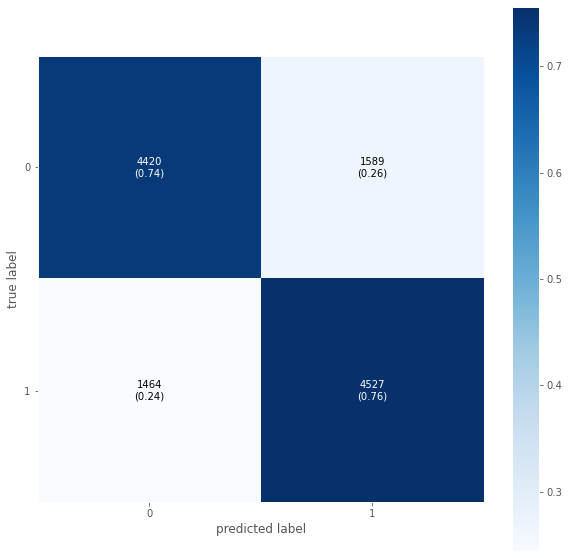

In [56]:
print('\n', 'Confusion Matrix', '\n')
CR=confusion_matrix(Y_test,y_pred)
print(CR, '\n')
fig, ax=plot_confusion_matrix(conf_mat=CR, figsize=(10,10),
                             show_absolute=True,
                             show_normed=True,
                             colorbar=True)
plt.show()

* These are the evaluation measures to evaluate the performance of the model.
* Dark blue boxes are the correct predictions with the trained model and sky blue boxes show the wrong predictions.
* 4610 tweets correctly predicted as negative sentiments. 1399 tweets predicted positive sentiments but those were actually negative sentiments.
* 4247 tweets correctly predicted as positive sentiments. 1744 tweets predicted negative sentiments but those were actually positive sentiments.